# Pothole Classification

## Load Packages

In [ ]:
#pip install simple_image_download

In [ ]:
#pip install opencv-python

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from simple_image_download import simple_image_download as simp
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.optimizers import Adam


from tensorflow.keras import datasets, layers, models
import pickle


In [2]:
# response = simp.simple_image_download

# response().download('pothole', 3000)

# print(response().urls('pothole', 3000))

## Adjust images

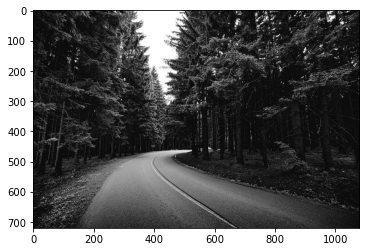

In [3]:
DATASET_LOCATION = "/Users/naty/pothole/Pothole-Detector/Image Data/POTHOLE_DATA"
Categories = ['Not potholes', 'Potholes'] #Not potholes = 0, Potholes = 1

for category in Categories:  
    path = os.path.join(DATASET_LOCATION,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) #Locates both folders
        plt.imshow(img_array, cmap='gray') #plot array with matpot lib and display w/ openCV

        break  
    break

In [4]:
print(img_array) #Verify array values

[[13 15 16 ...  6 19 31]
 [10 14 18 ... 25 41 52]
 [12 17 22 ... 45 51 53]
 ...
 [11 11 11 ... 13 13 13]
 [13 13 13 ... 13 13 13]
 [13 13 12 ... 13 13 13]]


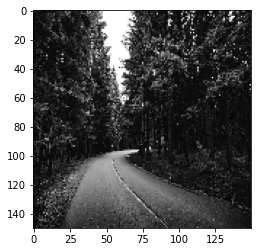

In [5]:
IMG_SIZE = 150 #adjust image size

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

##  Load in data

In [24]:
DATASET_LOCATION = "/Users/naty/pothole/Pothole-Detector/Image Data/POTHOLE_DATA"
Categories = ['Not potholes', 'Potholes'] #Not potholes = 0, Potholes = 1
IMG_SIZE = 150
training = []

def train_me():
    for category in Categories:  # do dogs and cats

        path = os.path.join(DATASET_LOCATION,category)  # create path to dogs and cats
        class_num = Categories.index(category)  # get the classification  (0 or a 1). 0=no pothole 1=pothole

        for img in (os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

train_me()

print(len(training))

1671


/Users/naty/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

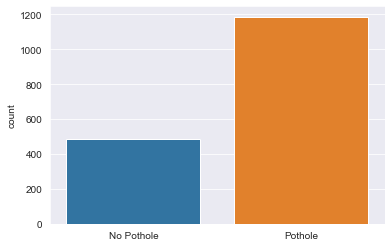

In [7]:
l = []
for i in training:
    if(i[1] == 0):
        l.append("No Pothole")
    else:
        l.append("Pothole")
        
        
sns.set_style('darkgrid')
sns.countplot(l)

In [8]:
random.shuffle(training)

In [9]:
for sample in training[:10]:
    print(sample[1])

1
0
1
1
0
1
1
1
1
0


In [10]:
X = []
y = []

for features,label in training:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  #(how many features, size, size, 1 color array)
y = np.array(y)

In [11]:
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1)) #Check me

[[[[143]
   [139]
   [136]
   ...
   [202]
   [195]
   [193]]

  [[139]
   [144]
   [137]
   ...
   [197]
   [191]
   [193]]

  [[139]
   [135]
   [140]
   ...
   [190]
   [184]
   [194]]

  ...

  [[ 81]
   [ 75]
   [131]
   ...
   [ 72]
   [ 72]
   [ 74]]

  [[ 94]
   [ 99]
   [147]
   ...
   [ 95]
   [ 77]
   [ 81]]

  [[133]
   [ 88]
   [151]
   ...
   [129]
   [ 82]
   [ 77]]]]


## First Simple Model

In [12]:
X = X/255.0 #Normalize data

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=100, epochs=30, validation_split=0.25)

model.save('FIRST.model')

Epoch 1/30
13/13 [==============================] - 87s 7s/step - loss: 3.4765 - accuracy: 0.5603 - val_loss: 0.5168 - val_accuracy: 0.7392
Epoch 2/30
13/13 [==============================] - 84s 6s/step - loss: 0.5158 - accuracy: 0.7542 - val_loss: 0.4230 - val_accuracy: 0.8158
Epoch 3/30
13/13 [==============================] - 83s 6s/step - loss: 0.4326 - accuracy: 0.7973 - val_loss: 0.4817 - val_accuracy: 0.8014
Epoch 4/30
13/13 [==============================] - 82s 6s/step - loss: 0.4023 - accuracy: 0.8204 - val_loss: 0.3660 - val_accuracy: 0.8373
Epoch 5/30
13/13 [==============================] - 82s 6s/step - loss: 0.3017 - accuracy: 0.8819 - val_loss: 0.2901 - val_accuracy: 0.8660
Epoch 6/30
13/13 [==============================] - 81s 6s/step - loss: 0.2089 - accuracy: 0.9178 - val_loss: 0.2918 - val_accuracy: 0.8804
Epoch 7/30
13/13 [==============================] - 80s 6s/step - loss: 0.1822 - accuracy: 0.9298 - val_loss: 0.2601 - val_accuracy: 0.8971
Epoch 8/30
13/13 [==

In [52]:
def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image 

In [53]:
model = tf.keras.models.load_model("FIRST.model")

In [54]:
prediction = model1.predict([prepare('/Users/naty/pothole/Pothole-Detector/Image Data/Testing/Not potholes/13.jpg')])

In [55]:
prediction #Correct!

array([[0.]], dtype=float32)

In [ ]:
#Confusion Matrix

In [ ]:
#All scores (f1 score too!)